In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:

from sklearn.datasets import load_wine
from sklearn.datasets import load_svmlight_files
from sklearn.datasets import load_linnerud


In [4]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, Y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

Load and return the digits dataset (classification).

Each datapoint is a 8x8 image of a digit.

Classes: 10

Samples per class: 180

Samples total:1797

Dimensionality: 64

Features: integers 0-16

This is a copy of the test set of the UCI ML hand-written digits datasets https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Read more in the User Guide.

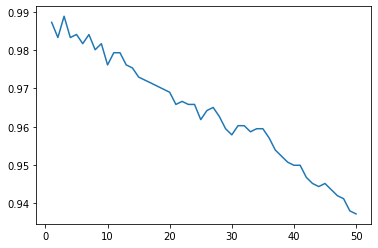

In [4]:
from sklearn.datasets import load_digits
_digits = load_digits()
X_train, x_test, Y_train, y_test = train_test_split(_digits.data,_digits.target,test_size=0.3)

title = "Change K"
xlable = "K"
k_range = range(0, 51)
X = []
Y = []
error = []

for k in range(0, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    mean, std = cross_validation(knn)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

plt.plot(k_range, Y)

100%|██████████| 5/5 [00:00<00:00,  6.66it/s]


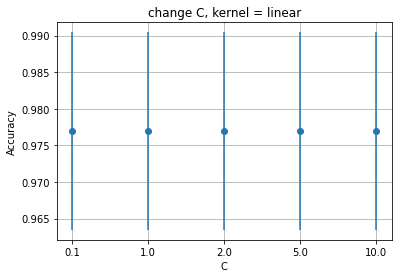

In [5]:
title = "change C, kernel = linear"
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    text_clf = svm.SVC(kernel='linear', C=C)
    mean, std = cross_validation(text_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

100%|██████████| 4/4 [00:04<00:00,  1.22s/it]


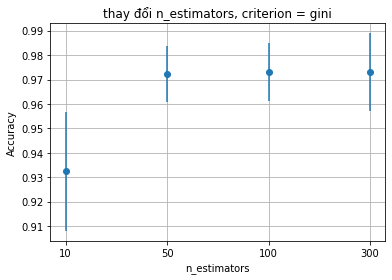

In [6]:
title = "thay đổi n_estimators, criterion = gini"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in tqdm([10, 50, 100, 300]):
    text_clf = RandomForestClassifier(criterion='gini', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

100%|██████████| 4/4 [00:25<00:00,  6.48s/it]


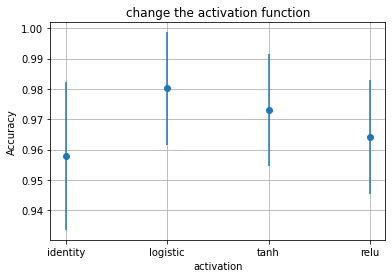

In [7]:
title = "change the activation function"
xlabel = "activation"
X = []
Y = []
error = []

for _activation in tqdm(['identity', 'logistic', 'tanh', 'relu']):
    ann_clf = MLPClassifier(max_iter=300, activation=_activation, hidden_layer_sizes=(100, 100))
    mean, std = cross_validation(ann_clf)
    X.append(str(_activation))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

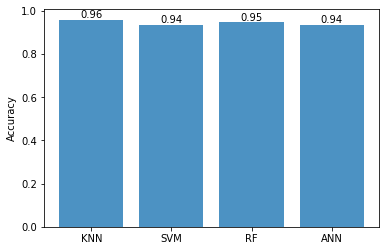

In [16]:
_knn = KNeighborsClassifier(n_neighbors=4)
_svm = svm.SVC(kernel='linear', C=1.0)
_rf = RandomForestClassifier(criterion="gini", n_estimators=100)
_ann = MLPClassifier(max_iter=300, activation='logistic', hidden_layer_sizes=(100, 100))

_knn.fit(X_train, Y_train)
_svm.fit(X_train, Y_train)
_rf.fit(X_train, Y_train)
_ann.fit(X_train, Y_train)

columns = ('KNN', 'SVM', 'RF', 'ANN')
data = [accuracy_score(y_test, _knn.predict(x_test)),
        accuracy_score(y_test, _svm.predict(x_test)),
        accuracy_score(y_test, _rf.predict(x_test)),
        accuracy_score(y_test, _ann.predict(x_test))]

fig, ax = plt.subplots()

x_pos = np.arange(len(columns))
ax.bar(x_pos, data, align='center', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(columns)
ax.set_ylabel('Accuracy')

for i, v in enumerate(data):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

Load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification dataset.

Classes

2

Samples per class: 212(M),357(B)

Samples total: 569

Dimensionality: 30

Features: real, positive

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is downloaded from: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Read more in the User Guide.

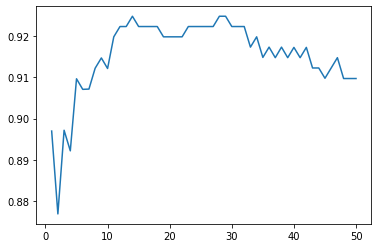

In [12]:
from sklearn.datasets import load_breast_cancer
_breast_cancer = load_breast_cancer()
X_train, x_test, Y_train, y_test = train_test_split(_breast_cancer.data,_breast_cancer.target,test_size=0.3)

title = "Change K"
xlable = "K"
k_range = range(0, 51)
X = []
Y = []
error = []

for k in range(0, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    mean, std = cross_validation(knn)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

plt.plot(k_range, Y)


100%|██████████| 5/5 [00:19<00:00,  3.95s/it]


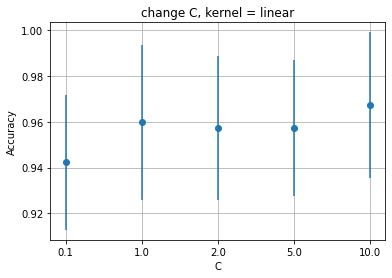

In [13]:
title = "change C, kernel = linear"
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    text_clf = svm.SVC(kernel='linear', C=C)
    mean, std = cross_validation(text_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()



100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


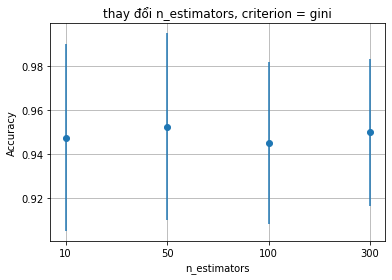

In [14]:
title = "thay đổi n_estimators, criterion = gini"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in tqdm([10, 50, 100, 300]):
    text_clf = RandomForestClassifier(criterion='gini', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

100%|██████████| 4/4 [00:07<00:00,  1.92s/it]


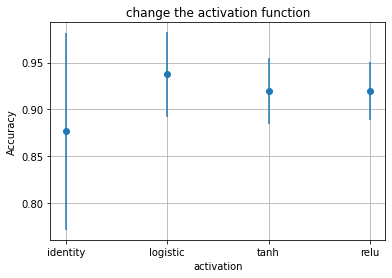

In [15]:
title = "change the activation function"
xlabel = "activation"
X = []
Y = []
error = []

for _activation in tqdm(['identity', 'logistic', 'tanh', 'relu']):
    ann_clf = MLPClassifier(max_iter=300, activation=_activation, hidden_layer_sizes=(100, 100))
    mean, std = cross_validation(ann_clf)
    X.append(str(_activation))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

c:\Users\My PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


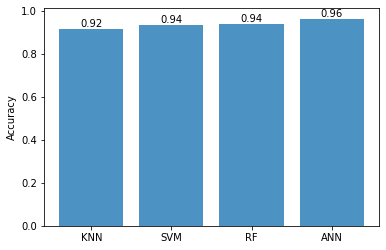

In [18]:
_knn = KNeighborsClassifier(n_neighbors=15)
_svm = svm.SVC(kernel='linear', C=10)
_rf = RandomForestClassifier(criterion="gini", n_estimators=50)
_ann = MLPClassifier(max_iter=300, activation='logistic', hidden_layer_sizes=(100, 100))

_knn.fit(X_train, Y_train)
_svm.fit(X_train, Y_train)
_rf.fit(X_train, Y_train)
_ann.fit(X_train, Y_train)

columns = ('KNN', 'SVM', 'RF', 'ANN')
data = [accuracy_score(y_test, _knn.predict(x_test)),
        accuracy_score(y_test, _svm.predict(x_test)),
        accuracy_score(y_test, _rf.predict(x_test)),
        accuracy_score(y_test, _ann.predict(x_test))]

fig, ax = plt.subplots()

x_pos = np.arange(len(columns))
ax.bar(x_pos, data, align='center', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(columns)
ax.set_ylabel('Accuracy')

for i, v in enumerate(data):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

Load and return the wine dataset (classification).

New in version 0.18.

The wine dataset is a classic and very easy multi-class classification dataset.

Classes: 3

Samples per class: [59,71,48]

Samples total: 178

Dimensionality: 13

Features: real, positive

The copy of UCI ML Wine Data Set dataset is downloaded and modified to fit standard format from: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

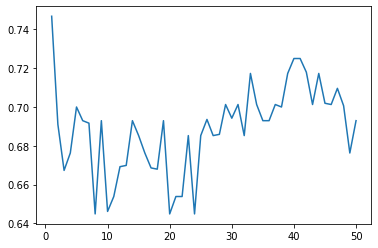

In [28]:
from sklearn.datasets import load_wine

wine = load_wine()

X_train, x_test, Y_train, y_test = train_test_split(wine.data, wine.target,test_size=0.3)


title = "Change K"
xlable = "K"
k_range = range(0, 51)
X = []
Y = []
error = []

for k in range(0, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    mean, std = cross_validation(knn)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

plt.plot(k_range, Y)

100%|██████████| 5/5 [00:01<00:00,  3.89it/s]


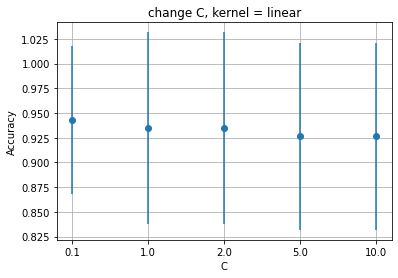

In [29]:
title = "change C, kernel = linear"
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    text_clf = svm.SVC(kernel='linear', C=C)
    mean, std = cross_validation(text_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


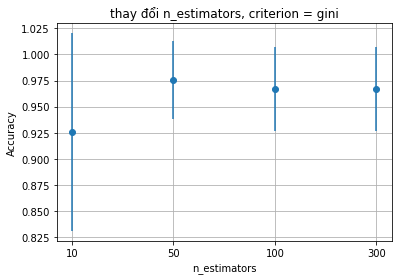

In [30]:
title = "thay đổi n_estimators, criterion = gini"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in tqdm([10, 50, 100, 300]):
    text_clf = RandomForestClassifier(criterion='gini', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


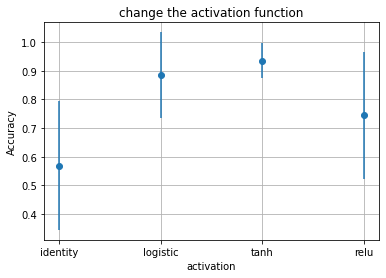

In [31]:
title = "change the activation function"
xlabel = "activation"
X = []
Y = []
error = []

for _activation in tqdm(['identity', 'logistic', 'tanh', 'relu']):
    ann_clf = MLPClassifier(max_iter=300, activation=_activation, hidden_layer_sizes=(100, 100))
    mean, std = cross_validation(ann_clf)
    X.append(str(_activation))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

c:\Users\My PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


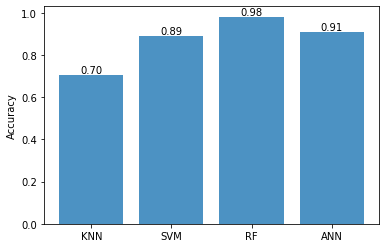

In [32]:
_knn = KNeighborsClassifier(n_neighbors=40)
_svm = svm.SVC(kernel='linear', C=0.1)
_rf = RandomForestClassifier(criterion="gini", n_estimators=50)
_ann = MLPClassifier(max_iter=300, activation='tanh', hidden_layer_sizes=(100, 100))

_knn.fit(X_train, Y_train)
_svm.fit(X_train, Y_train)
_rf.fit(X_train, Y_train)
_ann.fit(X_train, Y_train)

columns = ('KNN', 'SVM', 'RF', 'ANN')
data = [accuracy_score(y_test, _knn.predict(x_test)),
        accuracy_score(y_test, _svm.predict(x_test)),
        accuracy_score(y_test, _rf.predict(x_test)),
        accuracy_score(y_test, _ann.predict(x_test))]

fig, ax = plt.subplots()

x_pos = np.arange(len(columns))
ax.bar(x_pos, data, align='center', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(columns)
ax.set_ylabel('Accuracy')

for i, v in enumerate(data):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

In [6]:
dry_bean = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = dry_bean.iloc[:, 2:-1]
Y = dry_bean.iloc[:, -1]
Y = np.ravel(Y)

X_train, x_test, Y_train, y_test =train_test_split(X, Y, random_state=1)

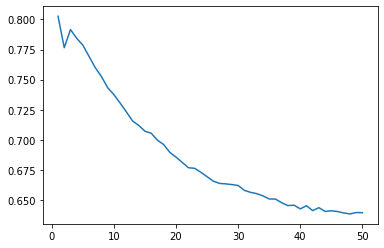

In [35]:
title = "Change K"
xlable = "K"
k_range = range(0, 51)
X = []
Y = []
error = []

for k in range(0, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    mean, std = cross_validation(knn)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

plt.plot(k_range, Y)

In [9]:
# title = "change C, kernel = linear"
# xlabel = "C"
# X = []
# Y = []
# error = []

# for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
#     text_clf = svm.SVC(kernel='linear', C=C)
#     mean, std = cross_validation(text_clf)
#     X.append(str(C))
#     Y.append(mean)
#     error.append(std)

# plot(title, xlabel, X, Y, error)
# plt.show()

  0%|          | 0/5 [01:44<?, ?it/s]


KeyboardInterrupt: 

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:56<00:00, 14.15s/it]


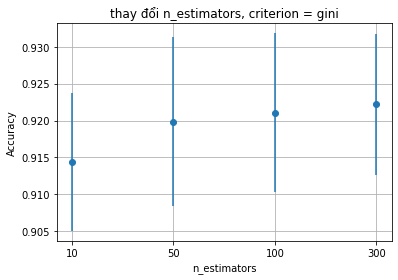

In [7]:
title = "thay đổi n_estimators, criterion = gini"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in tqdm([10, 50, 100, 300]):
    text_clf = RandomForestClassifier(criterion='gini', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

100%|██████████| 4/4 [01:11<00:00, 17.82s/it]


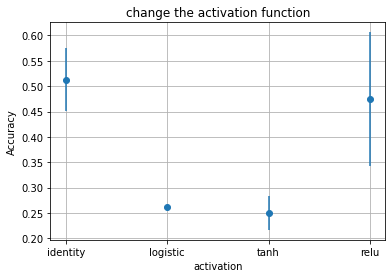

In [8]:

title = "change the activation function"
xlabel = "activation"
X = []
Y = []
error = []

for _activation in tqdm(['identity', 'logistic', 'tanh', 'relu']):
    ann_clf = MLPClassifier(max_iter=300, activation=_activation, hidden_layer_sizes=(100, 100))
    mean, std = cross_validation(ann_clf)
    X.append(str(_activation))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

In [ ]:
_knn = KNeighborsClassifier(n_neighbors=4)
# _svm = svm.SVC(kernel='linear', C=10)
_rf = RandomForestClassifier(criterion="gini", n_estimators=300)
_ann = MLPClassifier(max_iter=300, activation='identity', hidden_layer_sizes=(100, 100))

_knn.fit(X_train, Y_train)
_svm.fit(X_train, Y_train)
_rf.fit(X_train, Y_train)
_ann.fit(X_train, Y_train)

columns = ('KNN', 'RF', 'ANN')
data = [accuracy_score(y_test, _knn.predict(x_test)),
        accuracy_score(y_test, _rf.predict(x_test)),
        accuracy_score(y_test, _ann.predict(x_test))]

fig, ax = plt.subplots()

x_pos = np.arange(len(columns))
ax.bar(x_pos, data, align='center', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(columns)
ax.set_ylabel('Accuracy')

for i, v in enumerate(data):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()